In [ ]:
from google.colab import drive
import pandas as pd


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/Car Sales.xlsx"  # Update the file path accordingly
df = pd.read_excel(file_path)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Data Exploration
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
         Car_id       Date Customer Name Gender  Annual Income  \
0  C_CND_000001 2022-01-02     Geraldine   Male          13500   
1  C_CND_000002 2022-01-02           Gia   Male        1480000   
2  C_CND_000003 2022-01-02        Gianna   Male        1035000   
3  C_CND_000004 2022-01-02       Giselle   Male          13500   
4  C_CND_000005 2022-01-02         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft 

In [ ]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 1

In [ ]:
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
                                Date  Annual Income     Price ($)  \
count                          23906   2.390600e+04  23906.000000   
mean   2023-03-01 14:28:10.822387456   8.308403e+05  28090.247846   
min              2022-01-02 00:00:00   1.008000e+04   1200.000000   
25%              2022-09-20 00:00:00   3.860000e+05  18001.000000   
50%              2023-03-13 00:00:00   7.350000e+05  23000.000000   
75%              2023-09-08 00:00:00   1.175750e+06  34000.000000   
max              2023-12-31 00:00:00   1.120000e+07  85800.000000   
std                              NaN   7.200064e+05  14788.687608   

              Phone  
count  2.390600e+04  
mean   7.497741e+06  
min    6.000101e+06  
25%    6.746495e+06  
50%    7.496198e+06  
75%    8.248146e+06  
max    8.999579e+06  
std    8.674920e+05  


In [ ]:
print("\nNumber of missing values in the dataset:")
print(df.isnull().sum())



Number of missing values in the dataset:
Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


In [ ]:
# Drop irrelevant columns (Car_id, Date, Customer Name, Phone)
df = df.drop(columns=['Car_id', 'Date', 'Customer Name', 'Phone'])

In [ ]:
# Data Preprocessing
# Encode categorical variables
categorical_cols = ['Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']
df_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)


In [ ]:
# Standardize numerical variables
numerical_cols = ['Annual Income', 'Price ($)']
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_cols])
df_numerical = pd.DataFrame(scaled_numerical, columns=numerical_cols)

In [ ]:
# Combine categorical and numerical data
df_processed = pd.concat([df_numerical, df_categorical], axis=1)


In [ ]:
# Data Mining Techniques
# Check the columns in df_processed
print("Columns in df_processed:")
print(df_processed.columns)

# Drop Dealer_No if it exists
if 'Dealer_No' in df_processed.columns:
    df_processed = df_processed.drop(columns=['Dealer_No'])

# Validate the drop operation
print("\nColumns after dropping 'Dealer_No':")
print(df_processed.columns)


Columns in df_processed:
Index(['Annual Income', 'Price ($)', 'Gender_Male',
       'Dealer_Name_C & M Motors Inc', 'Dealer_Name_Capitol KIA',
       'Dealer_Name_Chrysler Plymouth', 'Dealer_Name_Chrysler of Tri-Cities',
       'Dealer_Name_Classic Chevy', 'Dealer_Name_Clay Johnson Auto Sales',
       'Dealer_Name_Diehl Motor CO Inc',
       ...
       'Body Style_Hatchback', 'Body Style_Passenger', 'Body Style_SUV',
       'Body Style_Sedan', 'Dealer_Region_Austin', 'Dealer_Region_Greenville',
       'Dealer_Region_Janesville', 'Dealer_Region_Middletown',
       'Dealer_Region_Pasco', 'Dealer_Region_Scottsdale'],
      dtype='object', length=226)

Columns after dropping 'Dealer_No':
Index(['Annual Income', 'Price ($)', 'Gender_Male',
       'Dealer_Name_C & M Motors Inc', 'Dealer_Name_Capitol KIA',
       'Dealer_Name_Chrysler Plymouth', 'Dealer_Name_Chrysler of Tri-Cities',
       'Dealer_Name_Classic Chevy', 'Dealer_Name_Clay Johnson Auto Sales',
       'Dealer_Name_Diehl Motor CO I

In [ ]:
# K-Means Clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_processed)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Fit the scaler to the entire dataset
scaler.fit(df_processed)
cluster_centers_original = scaler.inverse_transform(scaled_cluster_centers)

In [ ]:
# Validation and Performance Evaluation
# Silhouette Score
silhouette_avg = silhouette_score(df_processed, cluster_labels)
print(f"\nSilhouette Score: {silhouette_avg}")


Silhouette Score: 0.09974406378471201


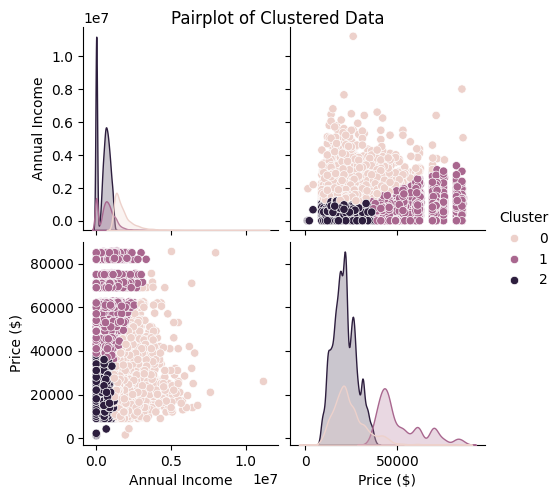

In [ ]:
# Visualizations

# Pairplot of Clustered Data
# This pairplot allows us to visualize the relationship between different pairs of features in our dataset.
# Each scatter plot represents a pair of features, with different colors indicating different clusters.
# It helps us identify any patterns or correlations between features within each cluster.

# Add clustering labels to the DataFrame
df['Cluster'] = cluster_labels

# Visualize Pairplot of Clustered Data
# Ensure that the column containing clustering labels is named correctly
sns.pairplot(df, hue='Cluster')
plt.suptitle('Pairplot of Clustered Data')
plt.show()

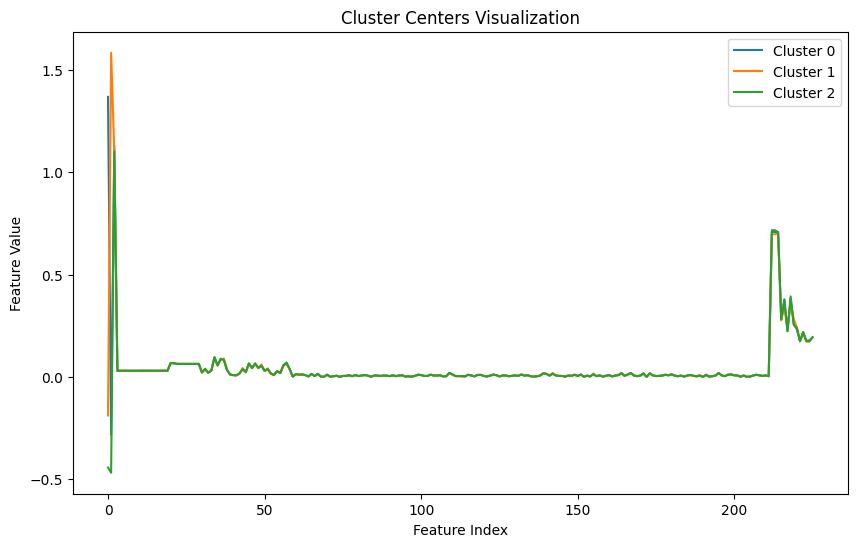

In [ ]:
# Cluster Centers Visualization
# This plot displays the cluster centers in the original feature space after inverse scaling.
# Each line represents the values of the features for a particular cluster center.
# It helps us understand the centroids of each cluster and the distribution of features across clusters.
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(cluster_centers_original[i], label=f'Cluster {i}')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Cluster Centers Visualization')
plt.legend()
plt.show()

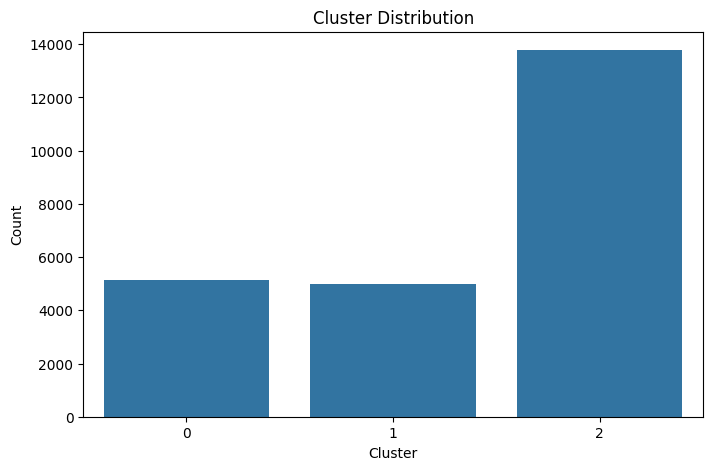

In [ ]:
# Cluster Distribution
# This countplot shows the distribution of data points among different clusters.
# It helps us understand the size and balance of each cluster.
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


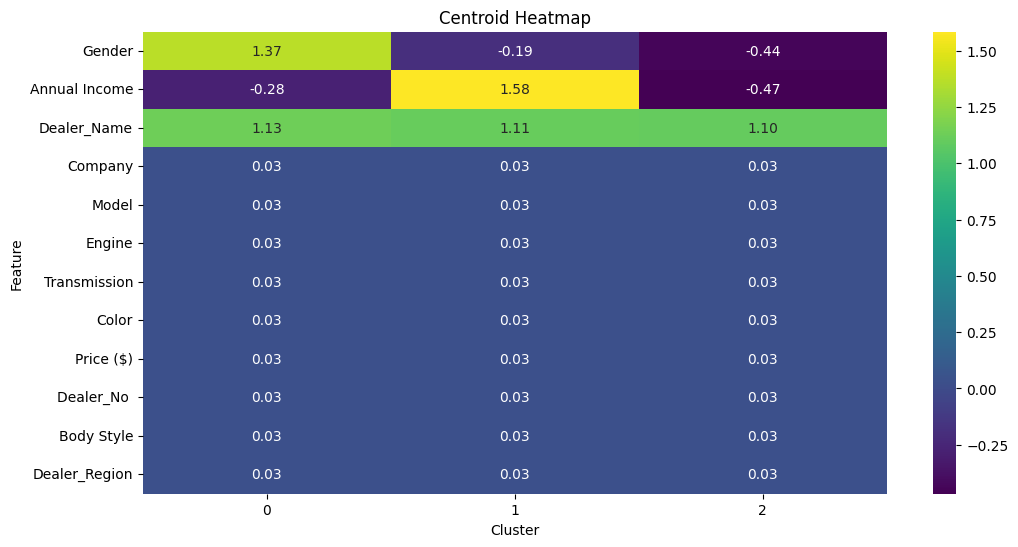

In [ ]:
# Centroid Heatmap
# This heatmap visualizes the centroids of each cluster across different features.
# Each row represents a feature, and each column represents a cluster.
# The color intensity indicates the value of each feature in the centroid of each cluster.
# It helps us compare the centroids of different clusters and identify any distinct patterns or differences.
# Ensure that the number of columns matches the number of features in the cluster centers
num_features = len(df.columns) - 1  # Exclude the 'Cluster' column
cluster_centers_df = pd.DataFrame(cluster_centers_original[:, :num_features], columns=df.columns[:-1])

# Visualize the centroid heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centers_df.T, cmap='viridis', annot=True, fmt=".2f")
plt.title('Centroid Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


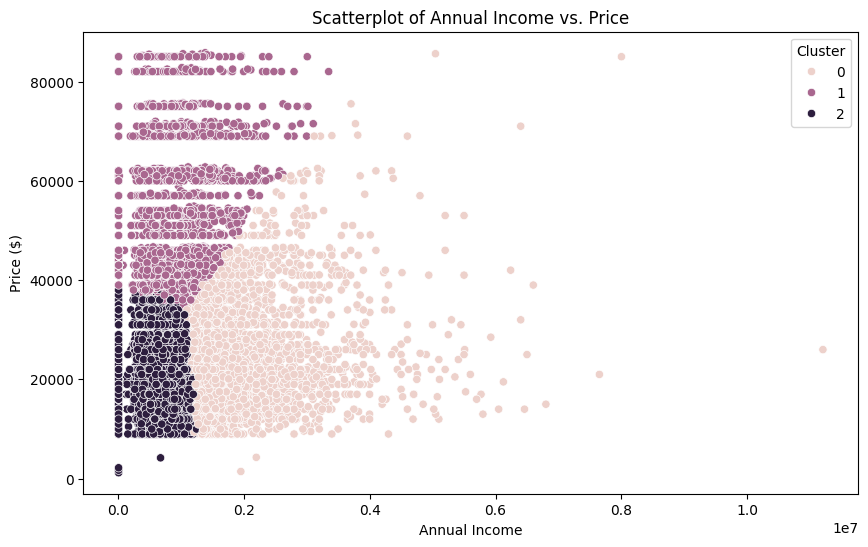

In [ ]:
# Additional Visualizations

# Scatterplot of Annual Income vs. Price
# This scatterplot shows the relationship between Annual Income and Price, with each data point colored by cluster.
# It helps us visualize how the clusters are distributed in terms of Annual Income and Price.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Cluster', data=df)
plt.title('Scatterplot of Annual Income vs. Price')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.show()

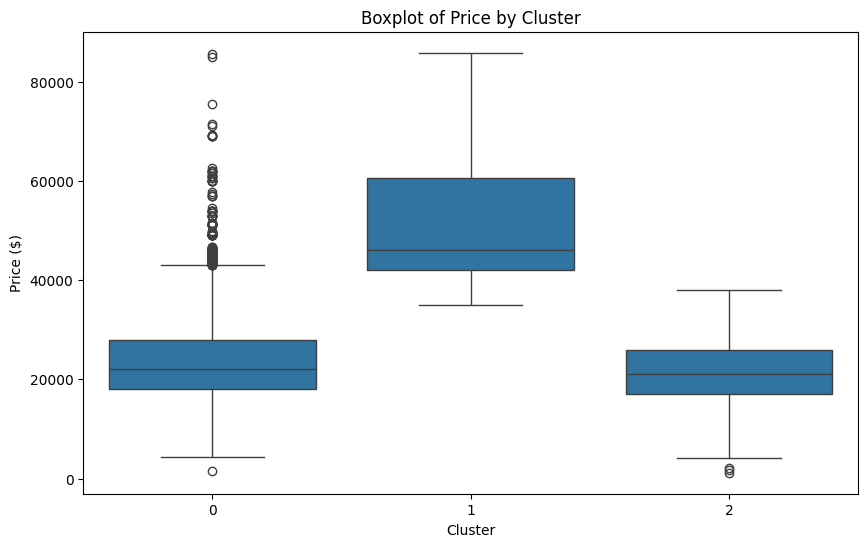

In [ ]:
# Boxplot of Price by Cluster
# This boxplot shows the distribution of Price within each cluster.
# It helps us understand the spread of Price values within each cluster and identify any outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Price ($)', data=df)
plt.title('Boxplot of Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price ($)')
plt.show()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df.to_csv('/content/drive/MyDrive/Car_Sales_Processed_Data.csv', index=False)  # This will save the DataFrame to a file named 'data.csv' without the index column

